# Proyecto del módulo uno

## Paso 1: apertura del archivo y análisis de la información general

### Inicialización
Comenzaremos cargando todas las librerías y le daremos un vistazo a la estructura general de la tabla.

In [1]:
# Carga de todas las librerías.
from scipy import stats as st
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Carga de datos

In [2]:
# Como empezaremos a trabajar con un solo DataFrame lo mantendremos simple y lo almacenaremos en la variable con nombre 'df'.
df = pd.read_csv('/datasets/games.csv')


### Familiarización con el DataFrame

In [3]:
# Información general del DataFrame.
df.info()
print()

# Impresión de las primeras filas.
print(df.head(10))
print()

# Datos estadísticos esenciales.
print(df.describe())
print()

# Comprobemos si hay duplicados
print(f'El número de duplicados es:',  df.duplicated().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB

                        Name Platform  Year_of_Release         Genre  \
0                 Wii Sports      Wii           2006.0        Sports   
1          Super Mario Bros.      NES           1985.0      Platform   
2             Mario Kart

### Conclusión

El DataFrame contiene información de lanzamientos de videojuegos que nos permitirá saber el éxito de los juegos en cada área del mundo que está incluida. A continuación en ordenaré los datos que deberían ser corregidos.

- Hay datos nulos que podrían ser cambiados por otra palabra, como 'unknown', o que podrían ser sustituidos por algún dato promedio si son números. Eso lo determinaremos más adelante al analizar cada columna individualmente.
- Los nombres de las columnas deberían estar en minúsculas.
- Los datos de la columna 'Year_of_Release' son de tipo float, pero podrían ser cadenas o enteros.
- Los datos de la columna 'User_score' deberían ser de tipo flotante para mantener los decimales. Los datos son originalmente de tipo object y eso podría dificultar su conversión.

## Paso dos: preparación de los datos
### Reemplazamiento de los nombres de las columnas
Las columnas deberían ir en minúsculas y respetar la convención 'snake_case'.

In [4]:
# Usamos el método 'lower()' para pasar las columnas a minúsculas.
df.columns = df.columns.str.lower()

# Echamos un vistazo
print(df.columns)

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')


No hay espacios en los nombres de las columnas. Ahora que todo está en minusculas estamos siguiendo la convención 'snake_case'.

### Conversión de los datos
Los datos de la columna 'year_of_release' son de tipo 'float64', pero será mejor si son enteros pues son años.

In [5]:
# Empezaremos convirtiendo los datos de 'year_of_release' a enteros.
df['year_of_release'] = df['year_of_release'].astype('Int64')

# Haremos una pequeña comprobación.
print(df['year_of_release'].dtypes)

Int64


A continuación vamos a convertir los datos de 'user_score' a datos de tipo 'float64' para mantener los decimales.

In [6]:
# Así las cadenas se harán decimales y si es que hay palabras.
df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce')

# Pequeña comprobación.
print(df['user_score'].dtypes)


float64


### Datos nulos
Analizaré las  columnas con datos nulos para saber cómo proceder. La primera columna con datos nulos es la columna 'name'. Solamente son dos entradas. Como es una columna con datos de tipo object sustituiremos los datos nulos con un string.

In [7]:
# Los nulos de la columna 'name' serán sustituidos por 'Unknown'.
df['name'].fillna('Unknown', inplace=True)

# Pequeña comprobación
print(df[df['name']== 'Unknown'])

          name platform  year_of_release genre  na_sales  eu_sales  jp_sales  \
659    Unknown      GEN             1993   NaN      1.78      0.53      0.00   
14244  Unknown      GEN             1993   NaN      0.00      0.00      0.03   

       other_sales  critic_score  user_score rating  
659           0.08           NaN         NaN    NaN  
14244         0.00           NaN         NaN    NaN  


La columna 'year_of_release'. Esta columna tiene más de 269 datos nulos. Con el nombre del juego podríamos añadir el año de lanzamiento, pero sería una tarea eterna.

No le veo caso a sustituir con la media o la mediana porque son años de lanzamiento, no ingresos por ventas o salarios. Esto podría dañar en análisis de los datos. Dejaré la columna 'year_of_release' tal como está.

La columna 'genre' tiene dos valores nulos. Los voy a sustituir con 'Unknown:

In [8]:
# Sustitución de valores nulos por 'Unknown'.
df['genre'].fillna('Unknown', inplace=True)

# Pequeña comprobación
print(df[df['genre']== 'Unknown'])


          name platform  year_of_release    genre  na_sales  eu_sales  \
659    Unknown      GEN             1993  Unknown      1.78      0.53   
14244  Unknown      GEN             1993  Unknown      0.00      0.00   

       jp_sales  other_sales  critic_score  user_score rating  
659        0.00         0.08           NaN         NaN    NaN  
14244      0.03         0.00           NaN         NaN    NaN  


Los valores sin datos en la columna 'name' y 'genre' son los mismos. Son solamente dos registros y no tienen datos en dos columnas. Son datos incompletos. Los borraré.

In [9]:
# Borremos los datos con 'Unknown' de cualquiera de las dos columnas.
df = df[~((df['name'] == 'Unknown') )]

# Pequeña comprobación.
df[(df['name'] == 'Unknown') & (df['genre'] == 'Unknown')]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


La columna 'critic_score' tiene más 8000 valores nulos. Son muchísimos. Aunque la verdad es que las puntuaciones no son muy importantes para nuestro análisis; nosotros estamos más concentrados en las ventas. Para no sesgar los valores con la media o la media vamos a dejar la información así.

Es lo mismo con la columna 'user_score'. No es útil modificar los datos. También dejaré la columna así.

La columna 'rating' tiene 3766 datos nulos. Los vamos a reemplazar con el string 'Unknown'.

In [10]:
# Reemplazamos los datos nulos de 'rating' por el string 'Unknown'.
df['rating'].fillna('Unknown', inplace=True)

# Hacemos una pequeña comprobación
df['rating'].isna().sum()


0

### Cálculo de las ventas totales
Vamos a hacer la suma de todas las columnas que contienen ventas. Esta suma se almacenará en una nueva columna.

In [11]:
# Suma de las columnas de ventas y creación de la nueva columa 'total_sales'.
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

# Veamos la nueva columna y comprobemos que contenga la información correcta.
df[['name', 'other_sales', 'total_sales']].head(10)

print(df.head())

                       name platform  year_of_release         genre  na_sales  \
0                Wii Sports      Wii             2006        Sports     41.36   
1         Super Mario Bros.      NES             1985      Platform     29.08   
2            Mario Kart Wii      Wii             2008        Racing     15.68   
3         Wii Sports Resort      Wii             2009        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB             1996  Role-Playing     11.27   

   eu_sales  jp_sales  other_sales  critic_score  user_score   rating  \
0     28.96      3.77         8.45          76.0         8.0        E   
1      3.58      6.81         0.77           NaN         NaN  Unknown   
2     12.76      3.79         3.29          82.0         8.3        E   
3     10.93      3.28         2.95          80.0         8.0        E   
4      8.89     10.22         1.00           NaN         NaN  Unknown   

   total_sales  
0        82.54  
1        40.24  
2        35.52  
3     

## Paso 3: analisis de datos
### Número de juegos lanzado por año
Descubramos cuáles fueron los años más prolíficos en cuanto a lanzamientos de videojuegos se refiere.

1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      60
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     653
2013     544
2014     581
2015     606
2016     502
Name: year_of_release, dtype: Int64


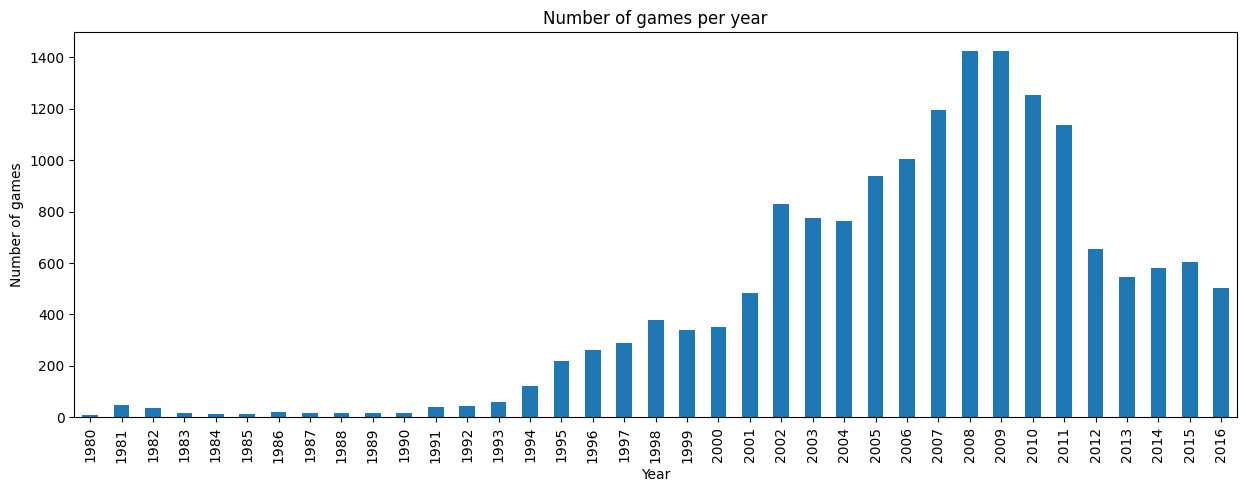

In [12]:
# Analizamos cuántos valores hay por año y los acomodamos en orden ascendente con base en el año.
print(df['year_of_release'].value_counts().sort_index())

# Lo podemos graficar para que sea más claro.
import matplotlib.pyplot as plt

df['year_of_release'].value_counts().sort_index().plot(
    kind='bar', 
    figsize=(15, 5),
    title='Number of games per year',
    xlabel='Year',
    ylabel='Number of games'
)

plt.show()




La década con menos lanzamientos es la primera de nuestro DataFrame, los ochentas. A partir de la década de los noventas nuestro DataFrame almacena un aumento en el número de lanzamientos, pero es la primer década del nuevo siglo donde vemos una mucho mayor salida de videojuegos. Después del año 2010 la productividad no se mantuvo igual de alta que en la década anterior.

### Variación de ventas entre plataformas
Descubramos cuáles son las plataformas con un mayor éxito respecto a las ventas. Después averiguaremos cuánto tardan generalmente las nuevas plataformas en aparecer y las antiguas en desaparecer con base en sus ventas en cada año.

platform
PS2     1255.77
X360     971.42
PS3      939.65
Wii      907.51
DS       806.12
PS       730.86
GBA      317.85
PS4      314.14
PSP      294.05
PC       259.52
Name: total_sales, dtype: float64


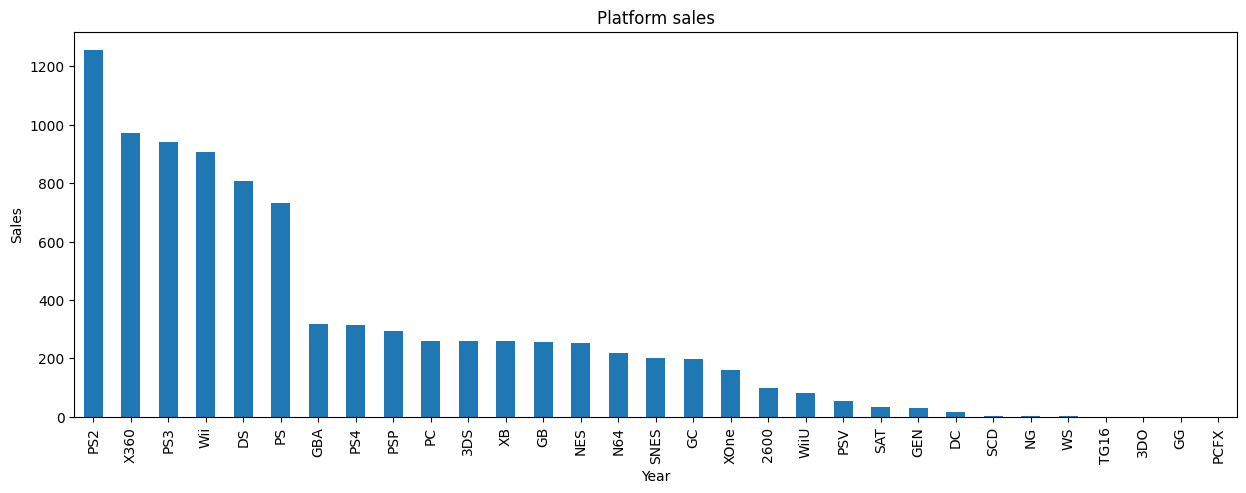

In [13]:
# Primero veamos cuáles son las consolas con más ventas.
platform_sales = df.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
print(platform_sales.head(10))  

# Ahora  vamos a mostrar esta información gráficamente.
platform_sales.plot(
    kind='bar', 
    figsize=(15, 5),
    title='Platform sales',
    xlabel='Year',
    ylabel='Sales'
)

plt.show()

A continuación vamos a agrupar las ventas con base en los años de lanzamiento, para así responder a la pregunta: ¿cuánto tardan generalmente las nuevas plataformas en aparecer y las antiguas en desaparecer? 

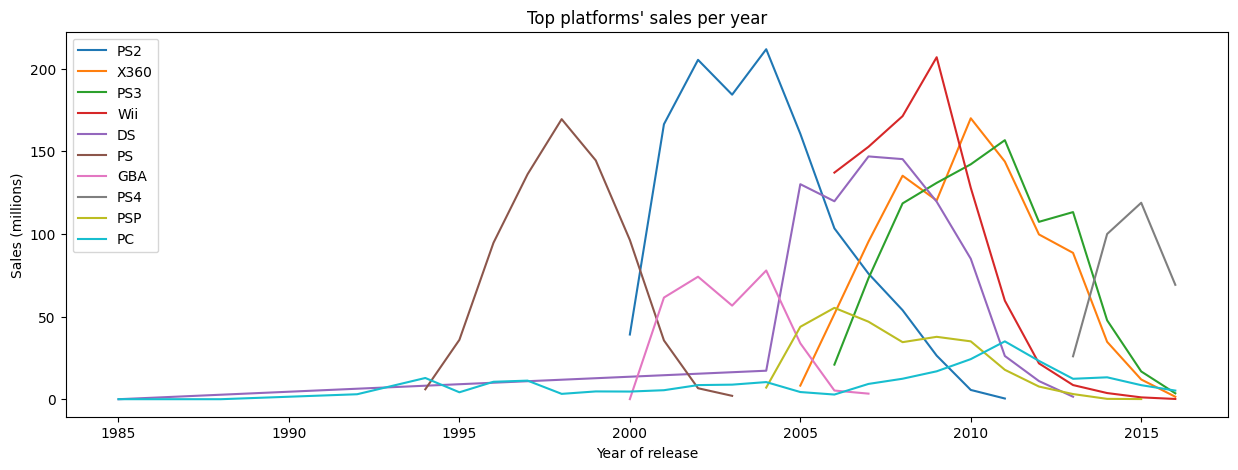

In [14]:
# Vamos a guardar en una variable las 10 plataformas con más ventas.
top_platforms = platform_sales.head(10).index  

# Con ciclo 'for'.
for platform in top_platforms:
    df[df['platform'] == platform].groupby('year_of_release')['total_sales'].sum().plot(
        label=platform, figsize=(15, 5)
    )

plt.title("Top platforms' sales per year")
plt.xlabel('Year of release')
plt.ylabel('Sales (millions)')
plt.legend()
plt.show()


Podemos concluir que en general el ciclo de vida de las consolas con más ventas va de cinco a diez años. Aproximadamente a la mitad de su vida tendrán un pico de ventas que se mantendrá por poco tiempo antes de la caida. Un caso curioso el de la PC: al ser un sistema diferente que siempre se puede actualizar su ciclo de vida nunca termina a pesar de no generar los mismos ingresos que las consolas de videojuegos.

### Determinación del periodo del que tomaremos datos
Debemos construir un modelo para el año 2017. Vamos a concentrarnos en los datos de año anterior. A partir de este punto trabajaremos con el año 2016 para saber cómo desarrollar una campaña para el año siguiente. Por lo tanto vamos a filtrar los datos de ese año en una nueva variable.


In [15]:
# Nueva varible con los datos del año seleccionado.
df_2016 = df[df['year_of_release'] == 2016]

# Pequeña comprobación.
print(df_2016['year_of_release'].unique())
print(df_2016.head())


<IntegerArray>
[2016]
Length: 1, dtype: Int64
                               name platform  year_of_release         genre  \
94                          FIFA 17      PS4             2016        Sports   
108                Pokemon Sun/Moon      3DS             2016  Role-Playing   
171      Uncharted 4: A Thief's End      PS4             2016       Shooter   
245  Call of Duty: Infinite Warfare      PS4             2016       Shooter   
289                   Battlefield 1      PS4             2016       Shooter   

     na_sales  eu_sales  jp_sales  other_sales  critic_score  user_score  \
94       0.66      5.75      0.08         1.11          85.0         5.0   
108      2.98      1.45      2.26         0.45           NaN         NaN   
171      1.85      2.50      0.19         0.85          93.0         7.9   
245      1.61      2.00      0.15         0.71          77.0         3.4   
289      1.10      2.15      0.21         0.61          88.0         8.4   

      rating  total_sa

### ¿Qué plataformas son líderes en ventas? ¿Cuáles crecen y cuáles se reducen? Elige varias plataformas potencialmente rentables.

Para responder a la primer pregunta debemos sumar las ventas por plataforma. Para responder a la segunda pregunta debemos comparar con años anteriores. Para responder a la tercer pregunta debemos ver cuáles plataformas tienen mejores ventas y están en una parte de su vida que nos hagan pensar que se mantendrán así o mejorarán.
#### ¿Qué plataformas son líderes en ventas?

platform
PS4     69.25
XOne    26.15
3DS     15.14
PC       5.25
WiiU     4.60
PSV      4.25
PS3      3.60
X360     1.52
Wii      0.18
Name: total_sales, dtype: float64


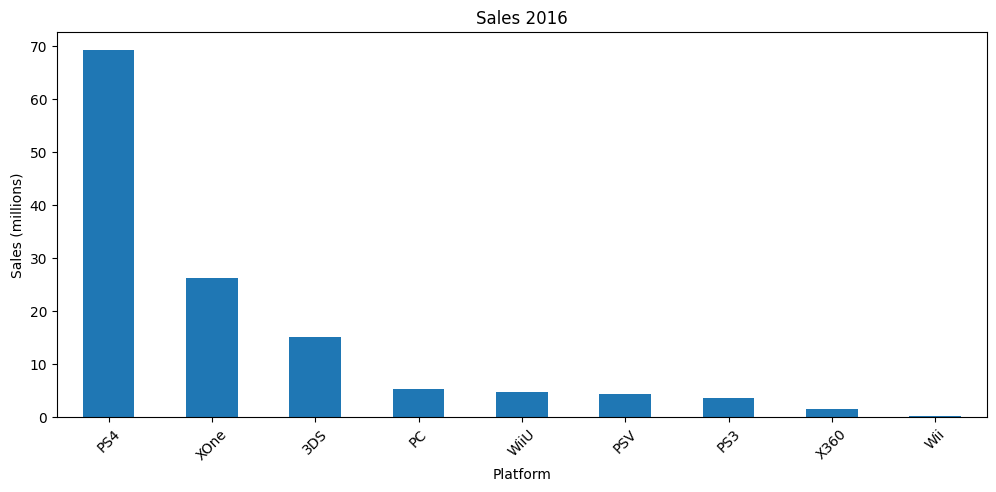

In [16]:
# Empecemos a sumar las ventas del año en cuestión.
platform_sales_2016 = df_2016.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
print(platform_sales_2016)

# Vamos a visualizarlo.
platform_sales_2016.plot(
    kind='bar',
    figsize=(12, 5),
    title='Sales 2016',
    xlabel='Platform',
    ylabel='Sales (millions)'
)
plt.xticks(rotation=45)
plt.show()



#### ¿Cuáles crecen y cuáles se reducen?
Vamos a concentrarnos en las consolas top de 2016 para, con base en lo que sabemos sobre los años de vida de las consolas, tomemos una buena decisión.

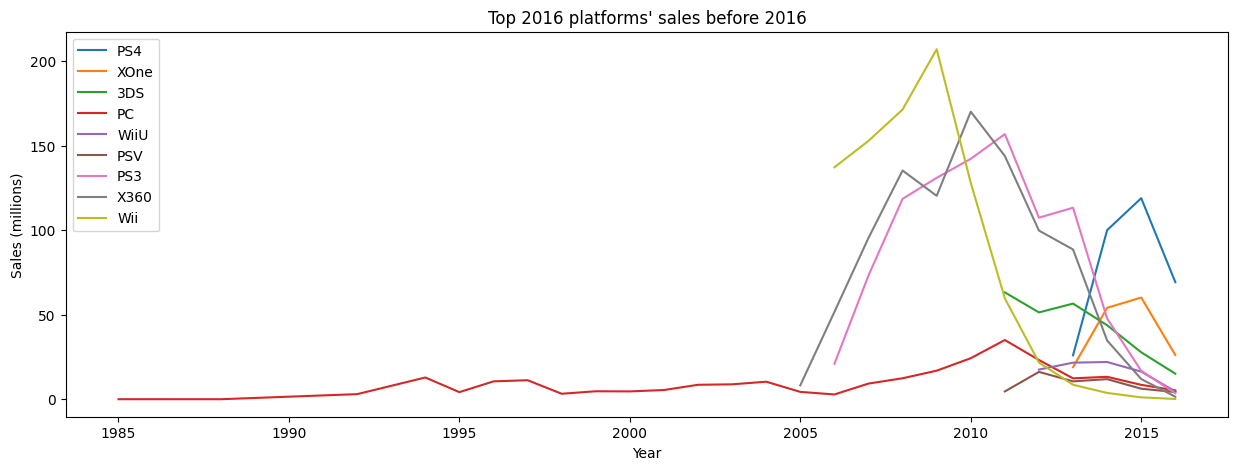

In [17]:
# Primero filtremos las consulas más exitosas de ese año con base en ventas.
platform_sales_2016 = df_2016.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

# Filtremos las diez consulas más exitosas.
top_platforms_2016 = platform_sales_2016.head(10).index

# Con este ciclo for filtramos cada consola y sumamos sus ventas por año.
for platform in top_platforms_2016:
    df[df['platform'] == platform] \
        .groupby('year_of_release')['total_sales'].sum() \
        .plot(label=platform, figsize=(15, 5))

plt.title("Top 2016 platforms' sales before 2016")
plt.xlabel("Year")
plt.ylabel("Sales (millions)")
plt.legend()
plt.show()



Con base en esta gráfica y la gráfica anterior, donde aprendimos un poco sobre la vida de las consolas, sabemos que las consolas de Sony y Microsoft tienen una vida larga, además son las que más ingresos generan por sus ventas. Selecciono como consolas rentables para el 2017 a la PS4 y la XOne.

### ¿Son significativas las diferencias en las ventas? ¿Qué sucede con las ventas promedio en varias plataformas?
El siguiente paso del proyecto nos pide hacer diagramas de caja para las ventas globales de los videojuegos, para poder responder las preguntas de este bloque.


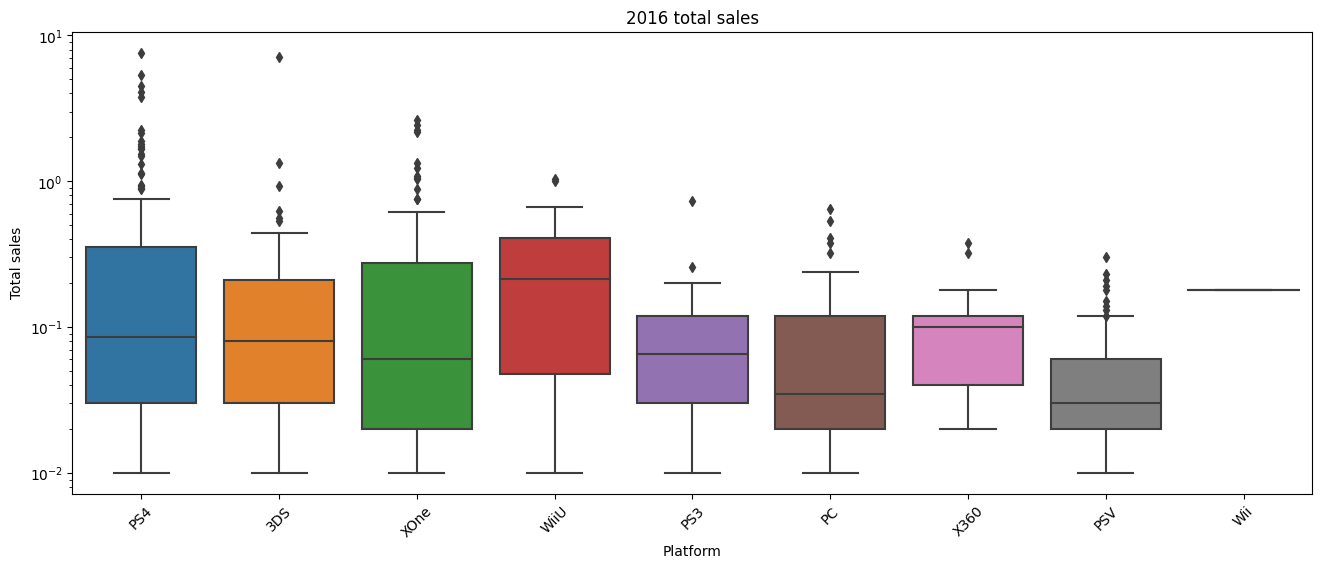

In [18]:
# Hagamos los diagramas de caja pedidos.
plt.figure(figsize=(16, 6))
sns.boxplot(
    data=df_2016,
    x='platform',
    y='total_sales'
)

plt.title('2016 total sales')
plt.xlabel('Platform')
plt.ylabel('Total sales')
plt.xticks(rotation=45)
plt.yscale('log')
plt.show()


Las ventas de el PS4 y el XOne tienen una mediana alta, pero no tanto como la de la WiiU. Éstas tres consolas tuvieron muchos títulos exitosos que se alejaron mucho de la mediana. Parece que el éxito de las consolas depende mucho de usos grandes 'hits'.

### Cómo las reseñas de usuarios y profesionales afectan las ventas de una plataforma popular

Para el siguiente punto seleccionaré a la consola con mayor ingresos por ventas de juegos, la PS4. Con un gráfico de dispersión vamos a ver cuál la correlación entre reseñas y ventas.



In [19]:
# Filtremos los datos de la PS4 en 2016.
ps4_2016 = df_2016[df_2016['platform'] == 'PS4']


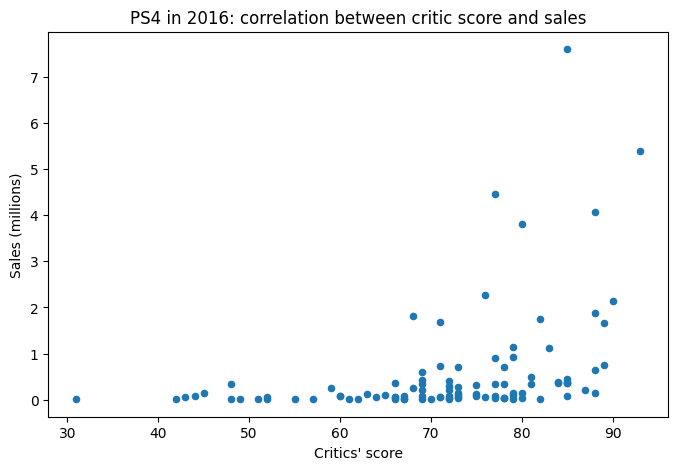

Correlation between critic score and sales: 0.37569493421469646


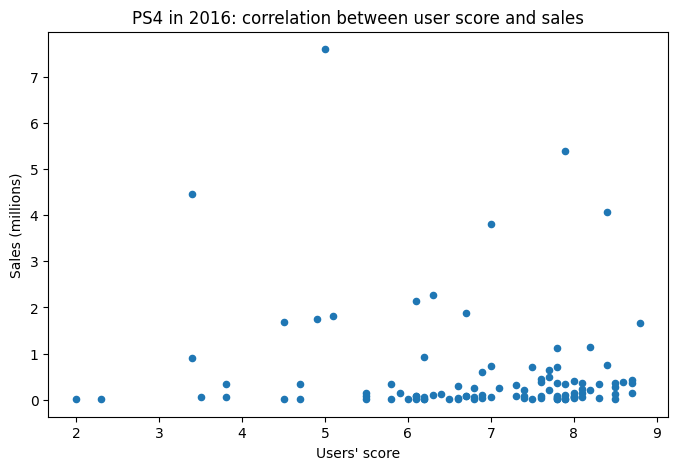

Correlation between user score and sales: -0.12246112419649201


In [20]:
# Primero graficaremos la relación entre la calificación de la crítica y las ventas.
ps4_2016.plot(
    kind='scatter',
    x='critic_score',
    y='total_sales',
    title= 'PS4 in 2016: correlation between critic score and sales',
    figsize=(8,5)
)
plt.xlabel("Critics' score")
plt.ylabel('Sales (millions)')
plt.show()

# Ahora sacamos la correlación.
print('Correlation between critic score and sales:', ps4_2016['total_sales'].corr(ps4_2016['critic_score']))

ps4_2016.plot(
    kind='scatter',
    x='user_score',
    y='total_sales',
    title='PS4 in 2016: correlation between user score and sales',
    figsize=(8,5)
)
plt.xlabel("Users' score")
plt.ylabel('Sales (millions)')
plt.show()

# Ahora sacamos la correlación
print('Correlation between user score and sales:', ps4_2016['total_sales'].corr(ps4_2016['user_score']))



La relación más alta se encuentra entre la calificación de la crítica y las ventas, pero aun así no es significativa. Al parecer las calificaciones que otorgan los usuarios y los críticos están relacionadas con el número final de ventas.

### Comparación de ventas de los videojuegos en otras plataformas
¿Hay juegos exitosos en alguna plataforma que en otra no lo sean? Podemos hacer un nuevo DataFrame que almacene las ventas de cada los juegos multiplataforma en cada plataforma. Vamos a filtrar los juegos que existen en más de una plataforma.

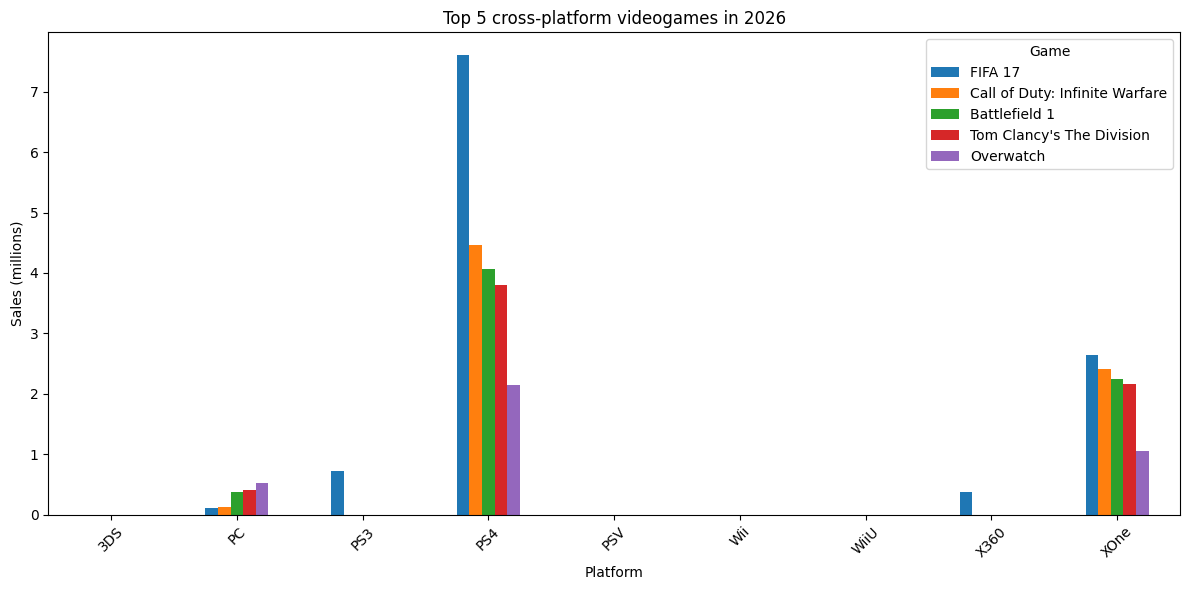

In [21]:
import matplotlib.pyplot as plt

# Filtramos los juegos multiplataforma.
multi_title_counts = df_2016['name'].value_counts()
multi_titles = multi_title_counts[multi_title_counts > 1].index

multi_platform_games = df_2016[df_2016['name'].isin(multi_titles)]

# Filtramos los más vendidos.
top_multi_titles = multi_platform_games.groupby('name')['total_sales'].sum().sort_values(ascending=False).head(5).index

# Los comparamos con una tabla.
comparison_table = multi_platform_games.pivot_table(
    index='name',
    columns='platform',
    values='total_sales',
    aggfunc='sum'
).fillna(0)

# Graficamos.
comparison_table.loc[top_multi_titles].T.plot(
    kind='bar',
    figsize=(12,6),
    title='Top 5 cross-platform videogames in 2026',
    ylabel='Sales (millions)',
    xlabel='Platform'
)
plt.legend(title='Game')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Las ventas de los videojuegos multi-plataforma más exitosos son parecidas en cuanto a éxito en diferentes consolas. La única excepción sería en PC, donde las ventas son más variables.

### Distribución general de los juegos por género
¿Qué se puede decir de los géneros más rentables? ¿Puedes generalizar acerca de los géneros con ventas altas y bajas? Respondamos las preguntas.

Primero veremos cuáles son los géneros con más lanzamientos, después cuáles son los géneros con más ventas y finalmente cuáles son los géneros con más ventas a nivel promedio.

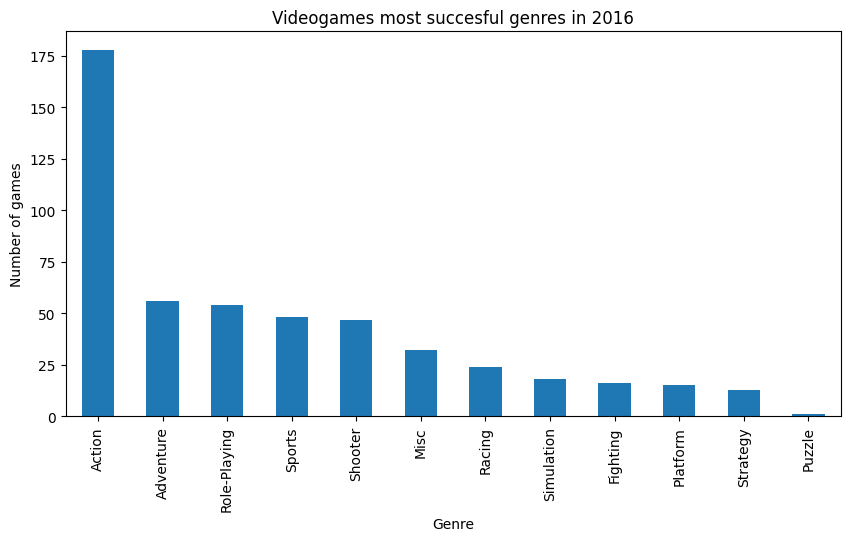

In [22]:
# Primero grafiquemos cuáles son los géneros con más lanzamientos.

df_2016['genre'].value_counts().plot(
    kind = 'bar',
    figsize = (10, 5),
    title = 'Videogames most succesful genres in 2016',
    xlabel = 'Genre',
    ylabel = 'Number of games')

plt.show()

Ahora veamos cuáles son los géneros con más ventas.

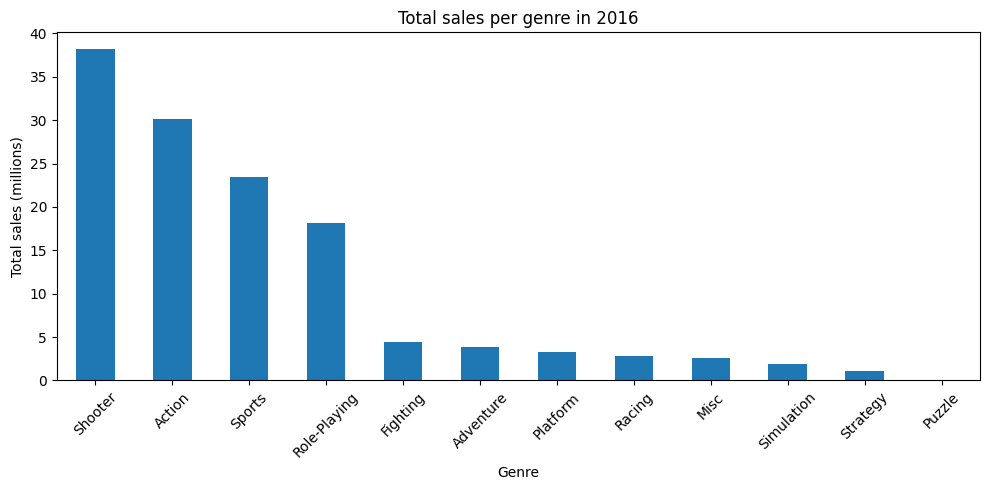

In [23]:
df_2016.groupby('genre')['total_sales'].sum().sort_values(ascending=False).plot(
    kind='bar',
    figsize=(10,5),
    title='Total sales per genre in 2016',
    xlabel='Genre',
    ylabel='Total sales (millions)'
)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Finalmente veamos las ventas promedio por juego por género.

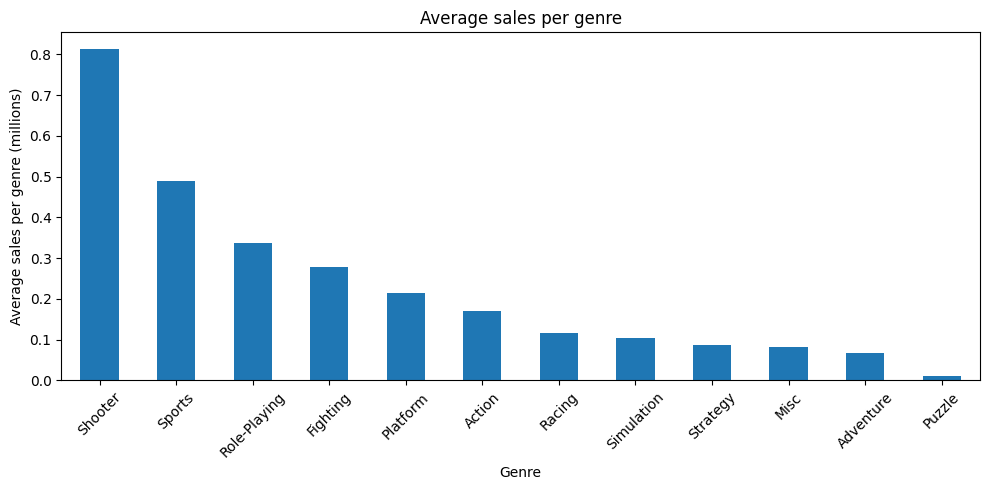

In [24]:
df_2016.groupby('genre')['total_sales'].mean().sort_values(ascending=False).plot(
    kind='bar',
    figsize=(10,5),
    title='Average sales per genre',
    xlabel='Genre',
    ylabel='Average sales per genre (millions)'
)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Los géneros más exitosos, shooters, juegos de acción y deportes, tuvieron ventas promedio altas y muchos lanzamientos. A pesar de que tengas muchos lanzamientos las personas los juegan. El género menos exitoso y que veremos al final de todas las tablas es el género 'Puzzle', que cuenta con pocos lanzamientos, pocas ventas promedio y por lo tanto poco éxito a nivel económico.

Con base en esta información podríamos hacer una campaña de publicitaria que se concentre en los juegos con generos más exitosos para así tener grandes hits, juegos con un número de ventas y retorno finaciero enorme que ayuden al éxito en las ventas. Como vimos anteriormente, el éxito de las ventas en consolas parece estar detemrinado mucho por los juegos con valores atípicos, muy por encima de la media y la mediana.

## Paso 4: crea un perfil de usuario para cada región
A continuación determinaremos tres aspectos fundamentales entre las posibles diferencias entre cada región. Primero veremos las variaciones cinco plataformas principales, después los cinco géneros principales y si la clasificación del juego afecta a las ventas en regiones individuales.



### Las cinco plataformas principales. Describe las variaciones en sus cuotas de mercado de una región a otra.

In [25]:
# Agrupemos las 5 plataformas más populares en Norteamérica.
na_top_platforms = df_2016.groupby('platform')['na_sales'].sum().sort_values(ascending=False).head(5)

# Agrupemos las 5 plataformas más populares en Europa.
eu_top_platforms = df_2016.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).head(5)

# Agrupemos las 5 plataformas más populares en Japón.
jp_top_platforms = df_2016.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).head(5)

# Echemos un vistazo.
print("Éstas son las cinco plataformas preferidas en Norteamérica:\n", na_top_platforms, "\n")
print("Éstas son las cinco plataformas preferidas en Europa:\n", eu_top_platforms, "\n")
print("Éstas son las cinco plataformas preferidas en Japón:\n", jp_top_platforms, "\n")



Éstas son las cinco plataformas preferidas en Norteamérica:
 platform
PS4     21.49
XOne    14.27
3DS      4.14
WiiU     2.10
PC       1.36
Name: na_sales, dtype: float64 

Éstas son las cinco plataformas preferidas en Europa:
 platform
PS4     31.78
XOne     9.63
PC       3.53
3DS      2.33
WiiU     1.48
Name: eu_sales, dtype: float64 

Éstas son las cinco plataformas preferidas en Japón:
 platform
3DS     8.03
PS4     5.74
PSV     3.56
PS3     1.30
WiiU    0.67
Name: jp_sales, dtype: float64 



Vamos a graficar toda la información.

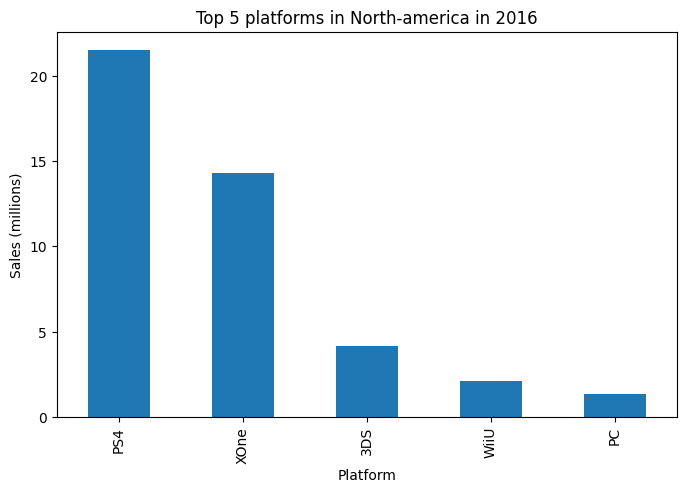

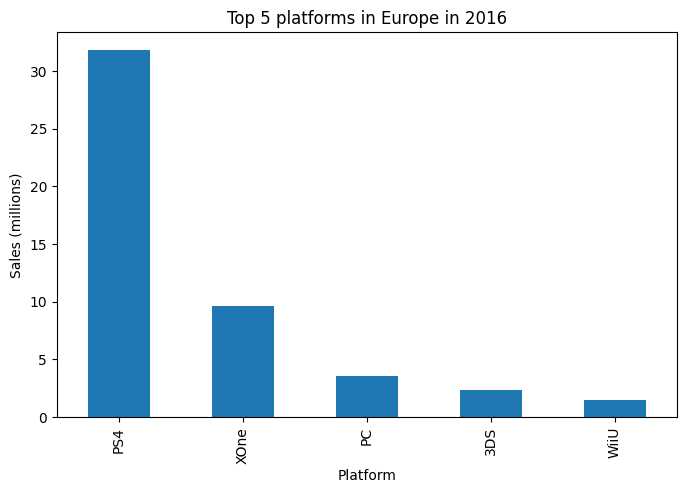

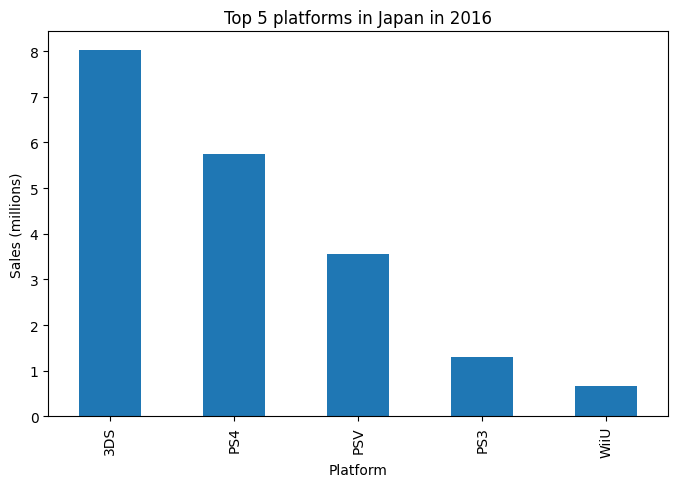

In [26]:
# Gráfica de Norteamérica.
na_top_platforms.plot(
    kind='bar',
    figsize=(8,5),
    title='Top 5 platforms in North-america in 2016',
    xlabel='Platform',
    ylabel='Sales (millions)',
    
)

plt.show()

# Gráfica de Europa.
eu_top_platforms.plot(
    kind='bar',
    figsize=(8,5),
    title='Top 5 platforms in Europe in 2016',
    xlabel='Platform',
    ylabel='Sales (millions)',
    
)

plt.show()

# Gráfica de japón.
jp_top_platforms.plot(
    kind='bar',
    figsize=(8,5),
    title='Top 5 platforms in Japan in 2016',
    xlabel='Platform',
    ylabel='Sales (millions)',
    
)

plt.show()




Si bien hay una similitud considerable entre Norteamérica y Europa, en Europa las personas juegan más en computadora. El mercado japones es diferente. Si bien el PS4 no es el líder, está segundo lugar. Su plataforma principal es la 3DS y disfrutan de una consola que no es tan popular en Europa ni Norteamérica, la PSV. Prefieren las consolas portátiles.

### Los cinco géneros principales. Explica la diferencia.
Haremos algo similar que con las cinco plataformas. Vamos a filtrar la información que nos interesa y después la graficaremos.

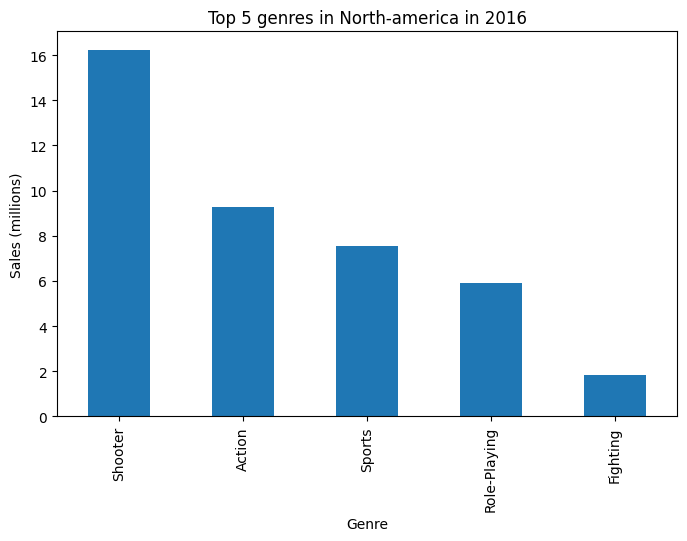

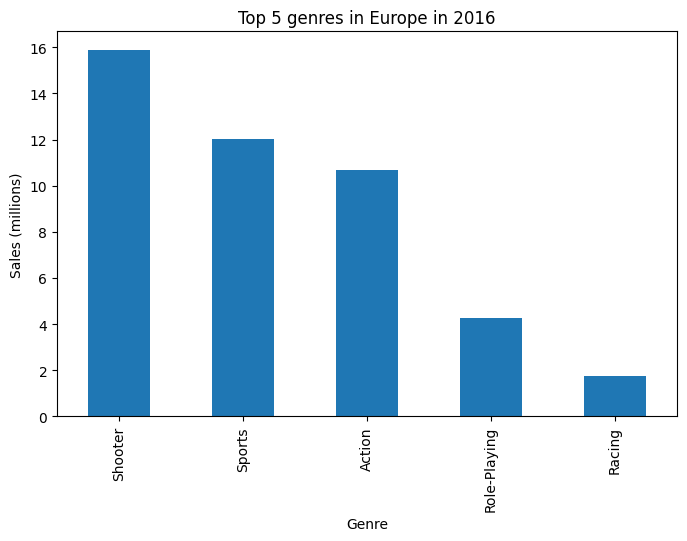

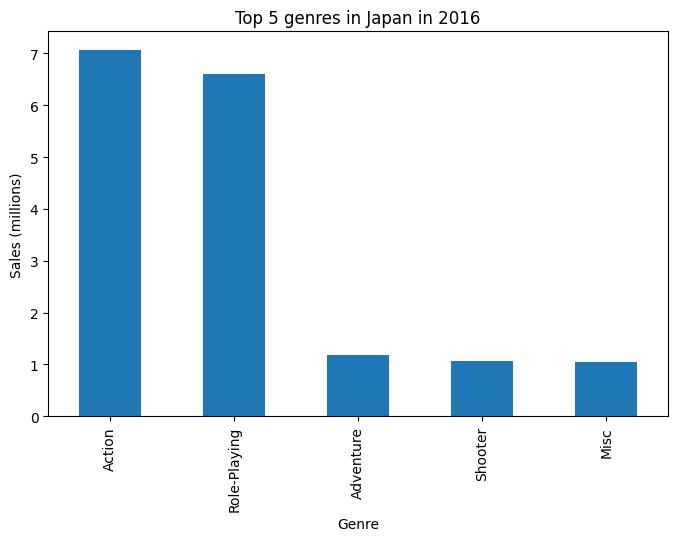

In [27]:
# Agrupamos con base en el género las ventas de cada región.
na_top_genres = df_2016.groupby('genre')['na_sales'].sum().sort_values(ascending=False).head(5)
eu_top_genres = df_2016.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).head(5)
jp_top_genres = df_2016.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).head(5)

# Gráfica de Norteamérica.
na_top_genres.plot(
    kind='bar',
    figsize=(8,5),
    title='Top 5 genres in North-america in 2016',
    xlabel='Genre',
    ylabel='Sales (millions)',
    
)

plt.show()

# Gráfica de Europa.
eu_top_genres.plot(
    kind='bar',
    figsize=(8,5),
    title='Top 5 genres in Europe in 2016',
    xlabel='Genre',
    ylabel='Sales (millions)',
    
)

plt.show()

# Gráfica de Japón.
jp_top_genres.plot(
    kind='bar',
    figsize=(8,5),
    title='Top 5 genres in Japan in 2016',
    xlabel='Genre',
    ylabel='Sales (millions)',
    
)

plt.show()


Al igual que con las consolas,  los datos de Norteamérica y Europa son muy similares. Los shooters, los juegos de acción y de deportes son los que dominaron el mercado en 2016. Norteamérica tuvo una gran predilección por los shooters así como Europa. 

El mercado japones estuvo dominado por los juegos de acción y de rol. Si bien también mostraron interés en los shooters, es mucho menos.

Occidente prefirió los shooters y occidente los juegos de acción y de rol.

### ¿Afectan las clasificaciones de ESRB las ventas?

         na_sales  eu_sales  jp_sales
rating                               
E            7.97     13.61      1.07
E10+         3.81      3.81      0.45
M           15.67     16.54      1.20
T            8.95      9.79      2.27
Unknown      8.53      7.47     14.32


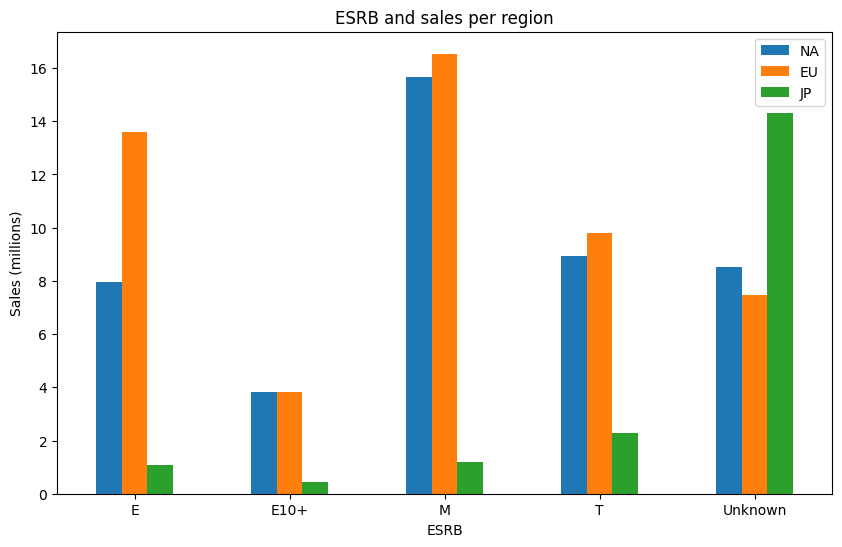

In [28]:
# Vamos a agrupar por clasificación y sumar los datos de cada región.
rating_sales = df_2016.groupby('rating')[['na_sales', 'eu_sales', 'jp_sales']].sum()

# Echemos un vistazo
print(rating_sales)

# Grafiquemos
rating_sales.plot(
    kind='bar',
    figsize=(10,6),
    title='ESRB and sales per region',
    xlabel='ESRB',
    ylabel='Sales (millions)',
    
)
plt.legend(['NA', 'EU', 'JP'])
plt.xticks(rotation=0)
plt.show()


Hay un dominio de la clasificación M (para adultos, 'Mature' en inglés) en las ventas en Europa y Norteamérica. Como vimos el género preferido de ambas regiones es el de los shooters (juegos de disparos), que muchas veces pueden ser considerados de una naturaleza violenta y dirigidos para adultos. Si bien esta clasificación podría limitar el acceso a los juegos a muchos usuarios -menores de edad-, el dominio sigue allí. La clasificación M es la más vendida y sus productos fueron rentables a pesar de las restricciones de la clasificación.

La siguiente clasificación más vendida es la E (sin restricciones, 'Everyone' en inglés). Los juegos de esta categoría pueden ser jugados por cualquier usuario sin importar su edad. La venta de juegos de está categoría no tiene ninguna restricción. Ahora que sabemos que los shooters son el género más popular y que este gpenero va dirigido a adultos, tiene sentido que la categoría E se lleve el segundo lugar en Europa y Norteamérica.

Al igual que en las dos tablas anteriores, el mercado japones destaca por ser diferente. Con los datos que tenemos podemos ver que su clasificación más vendida es la T (para adolescentes, 'Teen' en inglés). Los juegos de acción y de rol, a diferencia de los shooters, son de una naturaleza menos violenta y van dirigidos a un público más amplio. Para los japoneses no todo son disparos. 

## Paso 5: prueba las siguientes hipótesis
- Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.

- Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.

### Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas

Como estamos usando datos de grupos distintos y queremos ver si son iguales o diferentes, vamos a utilizar una prueba bilateral: la t de Student. El valor del umbral alfa será 0.05. 

La hipótesis nula básicamente niega diferencias entre la media de calificaciones de los usuarios de Xbox One y PC. Podemos formularla así:

- Hipótesis nula: La media de las calificaciones de usuarios en Xbox One es igual a la de PC.

La hipótesis alternativa afirma lo contrario, que la media de calificaciones de los usuarios de Xbox One y PC es diferente. Entonces podemos formularla así: 

- Hipótesis alternativa: La media de las calificaciones de usuarios en Xbox One es diferente a la de PC.




In [29]:
from scipy import stats as st
import numpy as np
import pandas as pd

# Filtramos las calificaciones válidas.
xbox_scores = df_2016[(df_2016['platform'] == 'XOne') & (df_2016['user_score'].notnull())]['user_score']
pc_scores = df_2016[(df_2016['platform'] == 'PC') & (df_2016['user_score'].notnull())]['user_score']

# El nivel de significancia de alpha será de 0.05.
alpha = 0.05

# Prueba t de Student.
results = st.ttest_ind(xbox_scores, pc_scores)

print('valor p:', results.pvalue)

if results.pvalue < alpha:
    print(
        "Rechazamos la hipótesis nula: las calificaciones promedio de usuarios para Xbox One y PC son significativamente diferentes."
    )
else:
    print(
        "No podemos rechazar la hipótesis nula: no hay diferencias significativas en las calificaciones promedio de usuarios entre Xbox One y PC."
    )


valor p: 0.33981967396516377
No podemos rechazar la hipótesis nula: no hay diferencias significativas en las calificaciones promedio de usuarios entre Xbox One y PC.


### Las calificaciones promedio de los usuarios para los géneros de acción y deportes son diferentes
Como estamos usando datos de grupos distintos y queremos ver si son iguales o diferentes, vamos a utilizar una prueba bilateral: la t de Student. El valor del umbral alfa será 0.05.

La hipótesis nula básicamente niega diferencias entre la media de calificaciones de los usuarios de juegos de acción y deportes. Podemos formularla así:

- Hipótesis nula:
La media de las calificaciones de usuarios en juegos de acción es igual a la de deportes.

La hipótesis alternativa afirma lo contrario, que la media de calificaciones de los usuarios de ambos géneros es diferente. Entonces podemos formularla así:

- Hipótesis alternativa:
La media de las calificaciones de usuarios en juegos de acción es diferente a la de deportes.

In [30]:
from scipy import stats as st
import numpy as np
import pandas as pd

# Filtramos las calificaciones válidas.
action_scores = df_2016[(df_2016['genre'] == 'Action') & (df_2016['user_score'].notnull())]['user_score']
sports_scores = df_2016[(df_2016['genre'] == 'Sports') & (df_2016['user_score'].notnull())]['user_score']

# El nivel de significancia de alpha será de 0.05.
alpha = 0.05

# Prueba t de Student.
results = st.ttest_ind(action_scores, sports_scores)

print('valor p:', results.pvalue)

if results.pvalue < alpha:
    print(
        "Rechazamos la hipótesis nula: las calificaciones promedio de usuarios para juegos de acción y deportes son significativamente diferentes."
    )
else:
    print(
        "No podemos rechazar la hipótesis nula: no hay diferencias significativas en las calificaciones promedio de usuarios entre acción y deportes."
    )


valor p: 0.000347482871898091
Rechazamos la hipótesis nula: las calificaciones promedio de usuarios para juegos de acción y deportes son significativamente diferentes.


## Paso 6: conclusión general

### Plataformas
Cuando se trata de las plataformas en Norteamérica y Europa la PS4 lidera el mercado, seguida por la XOne. Sin embargo, en Europa, las ventas en PC son más significativas que en Norteamérica. El mercado japonés prefiere plataformas portátiles como Nintendo 3DS y PSV.

### Generos
Respecto a los géneros en Norteamérica y Europa los géneros más vendidos son shooters, los juegos de acción y los de deportes, con una fuerte inclinación hacia los juegos naturaleza más adulta y competitiva.

En Japón, los géneros más populares son los de acción y de rol, de una naturaleza más narrativa. Una clara diferencia entre las regiones.

### Clasificaciones
En Norteamérica y Europa la clasificación M es la más vendida, lo cual tiene sentido dado el predominio de géneros como los shooters.

En Japón, la clasificación T lidera el mercado y esto va acorde a sus géneros más populares y su enfoque menos violento. La categoría Unknown tuvo un peso considerable en Japón.

### Pruebas de hipótesis

La primera prueba estadística no mostró diferencias significativas en las calificaciones promedio de los usuarios de Xbox One y PC. Se acepta la hipótesis nula.

Géneros Acción vs. Deportes:
En la segunda prueba se encontraron diferencias estadísticamente significativas entre las calificaciones promedios de los juegos de acción y deportes. Los géneros no gustan igual a los usuarios.

### Conclusión general

Los datos muestran que los mercados occidentales tienen muchas similitudes, y que el mercado japones es diferente a ellos. Los géneros preferidos y las consolas más vendidas en el mercado japones son diferentes. En todos los mercados los éxitos de las consolas y tiempo de vida parecen depender en gran parte de juegos que se conviertan en grandes éxitos de ventas, esos datos estadísticamente anormales que observamos en los diagramas de caja.

Con base en esta información y el éxito de los diferentes géneros de la región se podrían hacer campañas enfocadas en explotar las ventas de los géneros más populares en cada región. La clasificación M y sus restricciones no fueron un obstáculo para que los shooters y juegos de naturaleza violenta sean un éxito en occidente. 



